# # # Machine Learning Project

Project description: 

Apply classification on the given dataset. r holiday rentals’ daily rate pricing dataset contains 1623 Sevillian holiday rentals extracted from Booking.com with 28 features. The label corresponds to the daily rental price.



# Part 1: Data description and Analysis

In [13]:
import pandas as pd   # We use pandas to read the data set.
df = pd.read_excel('Dataset.xlsx')  # Read the dataset from an Excel file into a DataFrame.
df.head(5) # Display the first 5 rows of the DataFrame.

,Case no.,REG,ADD,PRICE,MIN,DISTRICT,DINDEX,BEDS,M2,TV,...,BATH,CAL,PICS,VSAP,HSWD,HSWE,LSWD,LSWE,SE1,SE2
0,1,VFT/SE/00001,CL GOLFO Nº 4 Portal B Plta/Piso 1 Pta IZQ,105.0,9,Casco Antiguo,1.0,4,95,1,...,0,9.5,45,6.0,0,0,1,0,0,0
1,2,VFT/SE/00001,CL GOLFO Nº 4 Portal B Plta/Piso 1 Pta IZQ,125.0,9,Casco Antiguo,1.0,5,95,1,...,0,9.5,45,6.0,0,0,1,0,0,0
2,3,VFT/SE/00001,CL GOLFO Nº 4 Portal B Plta/Piso 1 Pta IZQ,145.0,9,Casco Antiguo,1.0,6,95,1,...,0,9.5,45,6.0,0,0,1,0,0,0
3,4,VFT/SE/00004,CL SAN CLEMENTE Nº 8 Plta/Piso 2º Pta D,105.0,9,Casco Antiguo,1.0,4,72,1,...,0,8.9,36,6.5,0,1,0,0,0,0
4,5,VFT/SE/00004,CL SAN CLEMENTE Nº 8 Plta/Piso 2º Pta D,125.0,9,Casco Antiguo,1.0,5,72,1,...,0,8.9,36,6.5,0,1,0,0,0,0


In [14]:
#summary and quartiles
df.describe() # Generate summary statistics of the numerical columns in the DataFrame.

,Case no.,PRICE,MIN,DINDEX,BEDS,M2,TV,WASHM,BALCONY,TERRACE,...,BATH,CAL,PICS,VSAP,HSWD,HSWE,LSWD,LSWE,SE1,SE2
count,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,...,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,812.000000,162.093068,14.706716,0.959486,3.943931,75.797289,0.993839,0.958102,0.443007,0.357363,...,0.341343,8.870672,32.801602,8.403882,0.348121,0.134319,0.286506,0.102896,0.079482,0.048675
std,468.664059,105.542219,8.530947,0.091694,1.900402,40.817859,0.078277,0.200417,0.496894,0.479371,...,0.474306,0.677962,11.222229,0.825572,0.476521,0.341100,0.452268,0.303916,0.270574,0.215255
min,1.000000,42.000000,1.000000,0.406170,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,406.500000,98.425000,8.000000,1.000000,2.000000,50.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,8.500000,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,812.000000,129.000000,15.000000,1.000000,4.000000,65.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,9.000000,31.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1217.500000,187.750000,20.000000,1.000000,5.000000,90.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.400000,46.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1623.000000,1164.900000,93.000000,1.000000,15.000000,400.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.000000,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.dtypes # Display the data types of each column in the DataFrame, so that we know which columns/features needs cleaning

Case no.      int64
REG          object
ADD          object
PRICE       float64
MIN           int64
DISTRICT     object
DINDEX      float64
BEDS          int64
M2            int64
TV            int64
WASHM         int64
BALCONY       int64
TERRACE       int64
CRTYD         int64
VIEWS         int64
SND           int64
PARK          int64
PETS          int64
POOL          int64
BATH          int64
CAL         float64
PICS          int64
VSAP        float64
HSWD          int64
HSWE          int64
LSWD          int64
LSWE          int64
SE1           int64
SE2           int64
dtype: object

In [16]:
df.isna().sum() # Calculate the number of missing values in each column of the DataFrame.

Case no.    0
REG         0
ADD         0
PRICE       0
MIN         0
DISTRICT    0
DINDEX      0
BEDS        0
M2          0
TV          0
WASHM       0
BALCONY     0
TERRACE     0
CRTYD       0
VIEWS       0
SND         0
PARK        0
PETS        0
POOL        0
BATH        0
CAL         0
PICS        0
VSAP        0
HSWD        0
HSWE        0
LSWD        0
LSWE        0
SE1         0
SE2         0
dtype: int64

In [17]:
print(df.shape) # Print the shape (number of rows and columns) of the DataFrame.
print(df.columns)  # Print the column names of the DataFrame.

(1623, 29)
Index(['Case no.', 'REG', 'ADD', 'PRICE', 'MIN', 'DISTRICT', 'DINDEX', 'BEDS',
       'M2', 'TV', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND',
       'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE',
       'LSWD', 'LSWE', 'SE1', 'SE2'],
      dtype='object')


# Data cleaning and preprocessing

This section considers converting data into format that can be analysed and processed. We handle the datatypes and 
remove null values if any. We also drop the columns that do not add value to the further procedures, eg, Case number and REG number( RTA registration code no.) are ID and do not contribute in determining hotel prices. Since we've considered district, we also drop the ADD ( VFT Address) column.

In [18]:
df.drop(['Case no.', 'ADD', 'REG'], axis=1, inplace=True)
df['PRICE'] = df['PRICE'].astype(float) # Remove non-numeric characters from 'PRICE' and convert it to numeric.
df['DISTRICT'] = df['DISTRICT'].replace('[^a-zA-Z0-9 ]', '', regex=True).astype(str) # Remove special characters from 'DISTRICT'.
#Since there are no null values, we don't have to process that, outliers can be removed after visualization
df.head()

,PRICE,MIN,DISTRICT,DINDEX,BEDS,M2,TV,WASHM,BALCONY,TERRACE,...,BATH,CAL,PICS,VSAP,HSWD,HSWE,LSWD,LSWE,SE1,SE2
0,105.0,9,Casco Antiguo,1.0,4,95,1,1,1,0,...,0,9.5,45,6.0,0,0,1,0,0,0
1,125.0,9,Casco Antiguo,1.0,5,95,1,1,1,0,...,0,9.5,45,6.0,0,0,1,0,0,0
2,145.0,9,Casco Antiguo,1.0,6,95,1,1,1,0,...,0,9.5,45,6.0,0,0,1,0,0,0
3,105.0,9,Casco Antiguo,1.0,4,72,1,1,1,1,...,0,8.9,36,6.5,0,1,0,0,0,0
4,125.0,9,Casco Antiguo,1.0,5,72,1,1,1,1,...,0,8.9,36,6.5,0,1,0,0,0,0


# Data Visualization

This section includes analysing mathematical representations of the numeric columns in the data, since Correlation is mathematically defined only for numerical values. We plot barplots for categorical data to see how the choices are distributed.

We plot boxplot to figure out if we have any outliers.(They are kept in the data because the price hikes in situations where the place is better/holiday season arrives are considered. Prices are a volatile factor and all features and columns will essentially play some role in the output)

In [8]:
categ = ['DISTRICT', 
        'TV', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND',
       'PARK', 'PETS', 'POOL', 'BATH',  'HSWD', 'HSWE',
       'LSWD', 'LSWE', 'SE1', 'SE2']
numer = ['MIN',  'DINDEX', 'BEDS','M2','PICS', 'VSAP','CAL']

In [9]:
df[numer].corr()

,MIN,DINDEX,BEDS,M2,PICS,VSAP,CAL
MIN,1.000000,-0.590497,0.052225,-0.053961,-0.222273,-0.272659,-0.075403
DINDEX,-0.590497,1.000000,-0.048436,-0.013023,0.123444,0.168342,-0.029783
BEDS,0.052225,-0.048436,1.000000,0.566659,0.169749,0.211119,-0.015681
M2,-0.053961,-0.013023,0.566659,1.000000,0.209931,0.353430,0.141570
PICS,-0.222273,0.123444,0.169749,0.209931,1.000000,0.301552,0.058130
VSAP,-0.272659,0.168342,0.211119,0.353430,0.301552,1.000000,0.286585
CAL,-0.075403,-0.029783,-0.015681,0.141570,0.058130,0.286585,1.000000


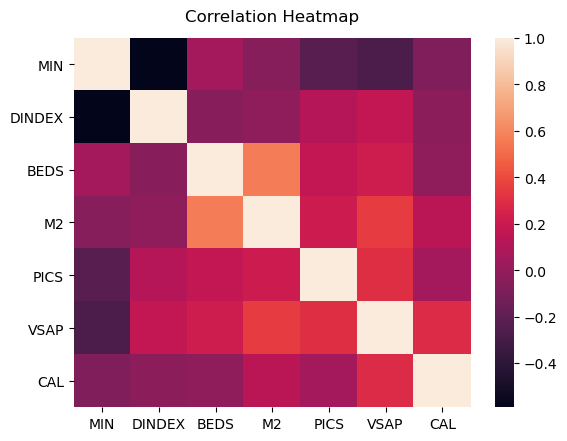

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
p1 = sns.heatmap(df[numer].corr())
p1.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

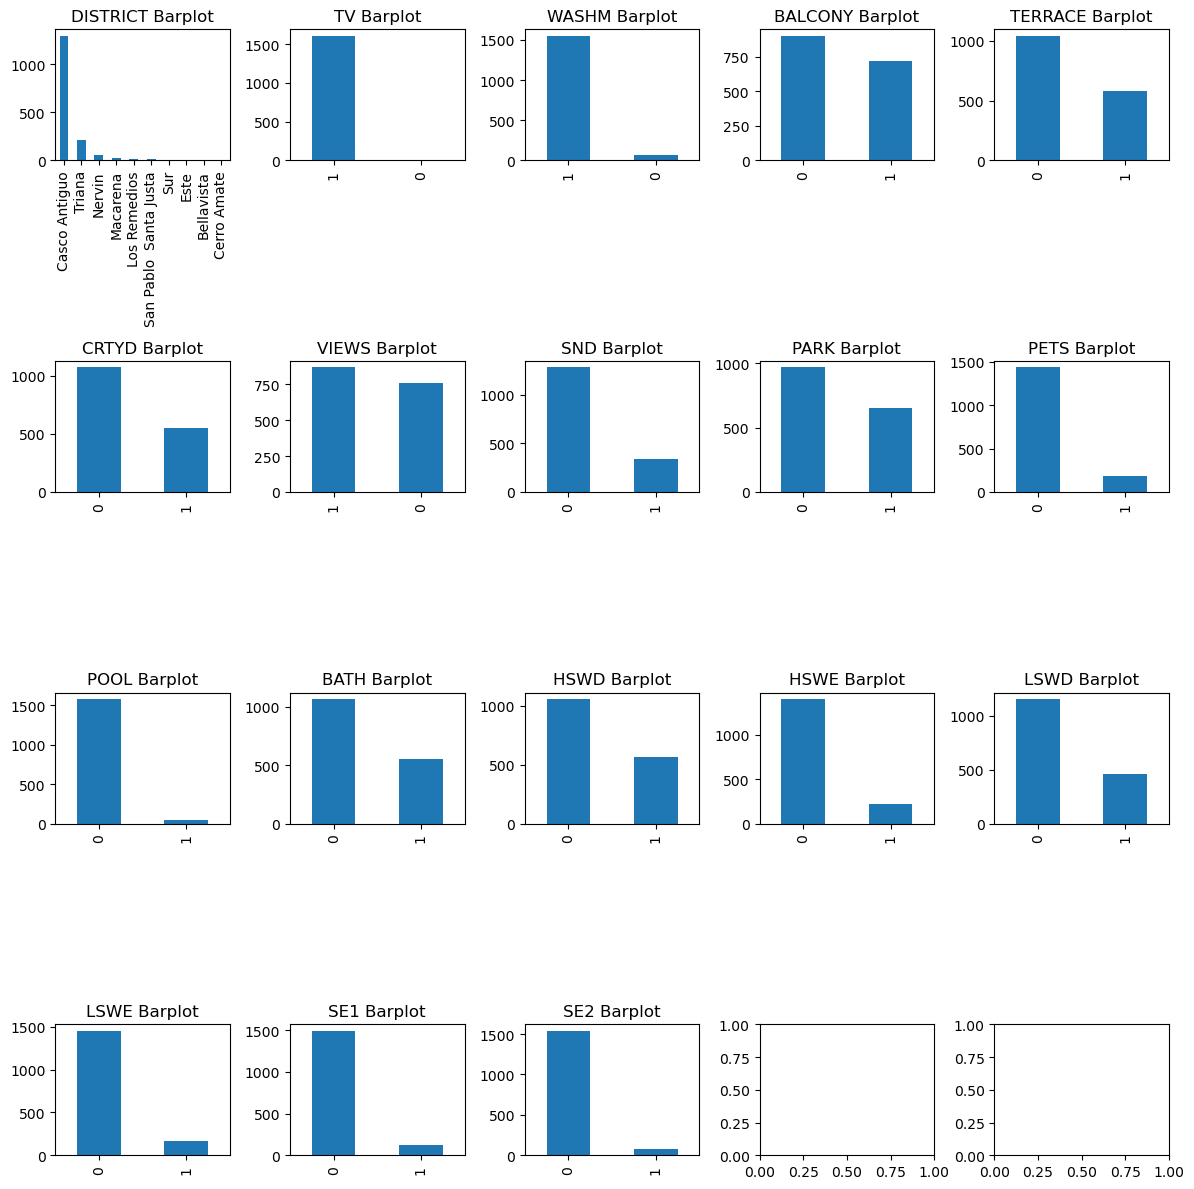

In [26]:
num_categories = len(categ)  # Get the number of categorical columns
num_rows = 4  # Define the number of rows for subplots
num_cols = 5  # Define the number of columns for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))  # Create subplots
axes = axes.flatten()  # Flatten the axes array to iterate over them easily
# Iterate over each categorical column
for i, column in enumerate(categ):
    df[column].value_counts().plot(kind='bar', ax=axes[i]) # Plot a barplot for the current categorical column
    axes[i].set_title(f'{column} Barplot') # Set title for the subplot indicating the column name
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

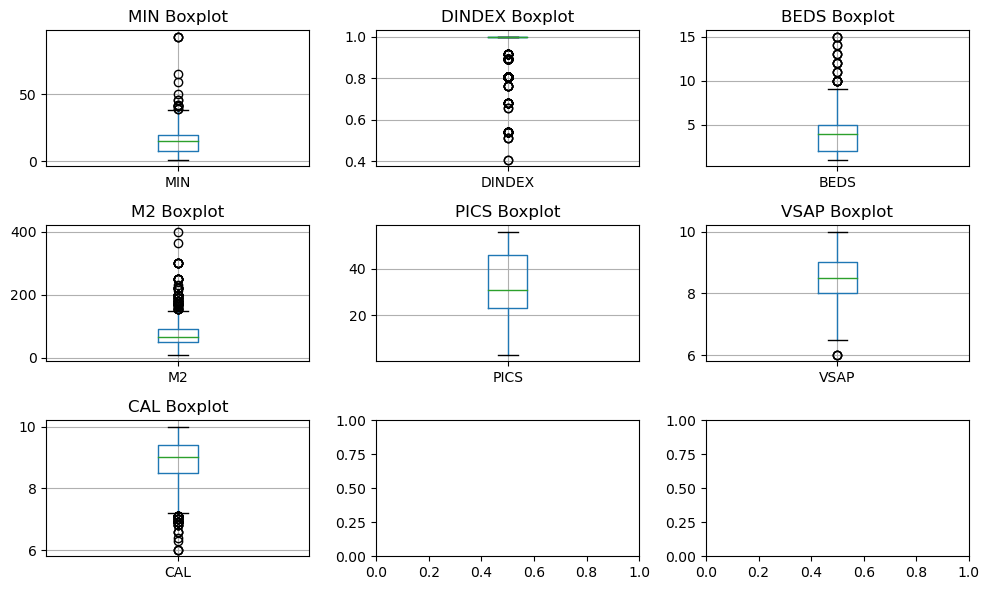

In [22]:
num_columns = len(numer)  # Get the number of numerical columns
num_rows = 3 # Define the number of rows for subplots
num_cols = 3 # Define the number of columns for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows)) # Create sub-boxplots
axes = axes.flatten() # Flatten the axes array to iterate over them easily
# Iterate over each numerical column
for i, column in enumerate(numer):
    df[numer].boxplot(column=[column], ax=axes[i]) # Plot a boxplot for the current numerical column
    axes[i].set_title(f'{column} Boxplot')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Display the plot

# Preparing data for Model application

This section includes separating label, converting the problem into classification problem and making it fit for model application

In [27]:
# Splitting the dataset into features (x) and target variable (y)
y = df['PRICE']
x = df.drop(['PRICE'], axis = 1)

In [28]:
#Discretizing the target variable: We discretize the 'PRICE' variable into quartiles and encode 
#them with labels. This is done to transform the continuous target variable into a categorical 
#variable with meaningful labels.
quartiles = [0, 0.25, 0.5, 0.75, 1]
y1 = pd.qcut(y, q=quartiles, labels=['low', 'lower-middle', 'higher-middle', 'high'])
mapping = {'low': 1, 'lower-middle': 2, 'higher-middle': 3, 'high': 4}
y1_numeric = y1.map(mapping)

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#ColumnTransformer allows us to handle different types of features separately during preprocessing. 
#In this case, we apply OneHotEncoder to categorical features to convert them into numerical 
#representation and StandardScaler to numerical features to scale them to have mean 0 
#and standard deviation 1.
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
            ('categorical', OneHotEncoder(), categ),  # Apply OneHotEncoder to categorical features
            ('numerical', StandardScaler(), numer) # Apply StandardScaler to numerical features
        ])

In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import numpy as np
#StratifiedKFold: Initializes StratifiedKFold cross-validation with 5 splits. 
#It ensures that each fold preserves the percentage of samples for each class.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#train_test_split: Splits the dataset into training and testing sets. 
# Here, 70% of the data is used for training and 30% for testing.'random_state' ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(x,y1_numeric,test_size=0.3, random_state = 42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1136, 25)
(487, 25)
(1136,)
(487,)


# Applying Basic Support Vector Classifier 

In this we apply SVC without any feature selection to established the base model. This section demonstrates how to construct a pipeline consisting of preprocessing steps (transformer) and a classifier (SVC) tuned using GridSearchCV. The pipeline is fitted to the training data and evaluated on the testing data using accuracy, recall, and confusion matrix.

In [32]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
# Create a pipeline consisting of transformer and classifier steps
svc = Pipeline([
    ('transformer', transformer),  # Add the transformer step
    ('classifier', GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={'C': np.logspace(-3, 3, 50)},  # Define the hyperparameter grid for C (regularization parameter)
        verbose=1, # Enable verbose output to display progress
        n_jobs=4, # Number of CPU cores to use for parallel processing (-1 uses all available cores)
        cv=kfold # Specify the cross-validation strategy (StratifiedKFold)
    ))
])
svc.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['DISTRICT', 'TV', 'WASHM',
                                                   'BALCONY', 'TERRACE',
                                                   'CRTYD', 'VIEWS', 'SND',
                                                   'PARK', 'PETS', 'POOL',
                                                   'BATH', 'HSWD', 'HSWE',
                                                   'LSWD', 'LSWE', 'SE1',
                                                   'SE2']),
                                                 ('numerical', StandardScaler(),
                                                  ['MIN', 'DINDEX', 'BEDS',
                                                   'M2', 'PICS', 'VSAP',
                                                   'CAL'])])),
                ('classifier',
 

In [33]:
pred = svc.predict(x_test) # Make predictions on the testing data
svc[-1].best_estimator_ # Get the best estimator (model) found by GridSearchCV

SVC(C=44.98432668969444)

In [34]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
print(accuracy_score(y_test,pred))  # Calculate accuracy
print(recall_score(y_test,pred,average='macro'))  # Calculate macro-averaged recall
print(confusion_matrix(y_test,pred)) # Generate confusion matrix

0.6796714579055442
0.6807839274546591
[[ 86  32   4   1]
 [ 44  72  18   1]
 [  4  24  66  10]
 [  3   0  15 107]]


# Model 1: Feature Selection(BSFS) + Naive Bayes(No Hyperparameters)

In this section we apply feature selection to our model. The backward stepwise feature selection algorithm removes the feature that results in the highest improvement in model performance (accuracy). This process continues until no further improvement is observed. This approach aims to eliminate irrelevant or redundant features, leading to a simpler and more interpretable model without sacrificing predictive accuracy.

We implement basic model using Guassian Naive Bayes that doesn't have any hyperparameters. It uses a probablistic approach that assumes each class follows a normal distribution, to find the final output. 

# OneVsOne Classifier

We show OneVsOne and OneVsRest to extend binary classification algorithm to multi-class classification scenario.

In [95]:
label = 'PRICE' #Assigning certain values for easy calculations
df[categ] = df[categ].astype('category')
features = [column for column in x_train.columns if column != label]
# Function to divide features into numerical and categorical types
def divide_type(col):
    cat=[]
    num=[]
    for c in col:
        if df[c].dtype.name == 'category':
            cat.append(c)
        else:
            num.append(c)
    return num,cat
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), #change the empty value with the most frequent
    OneHotEncoder())
transformer = ColumnTransformer(transformers=[('numerical', StandardScaler(), numer),('categorical', categorical_transformer, categ)])    
# Function to create a transformer based on numerical and categorical features
def trans(num,cat):
    transformer = ColumnTransformer(transformers=[('numerical', StandardScaler(), num),('categorical', categorical_transformer, cat)])    
    return transformer

In [96]:
# Class to store the best solution (features and accuracy)
class Solution:
    features = list()
    acc = float('Inf')
    def __init__(self, features=None, acc=None):
        self.features = features
        self.acc = acc
    def update(self, features, acc):
        if acc > self.acc:
            self.features = features
            self.acc = acc
            return True
        return False
# Function to remove a feature from the list of numerical or categorical features
def remove_transformer(feature):
    num = numerical1[:]
    cat = categorical1[:]
    if (feature in num):
            num.remove(feature)
    else:
            cat.remove(feature)
    return num, cat

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
#Defining OneVsOne and OneVsRest pipelines with Gaussian Naive Bayes classifier
onevsone = make_pipeline(
    transformer,
    OneVsOneClassifier(GaussianNB())
)
onevrest = make_pipeline(
    transformer,
    OneVsRestClassifier(GaussianNB())
)

In [98]:
current_features = list(features) # Initialize the current set of features
onevsone.fit(x_train[current_features],y_train) # Fit the OneVsOne model to the training data and make predictions on the test data
pred = onevsone.predict(x_test[current_features])
acc = accuracy_score(y_test,pred)
best = Solution(features=current_features,acc=acc) # Store the initial best solution
while len(current_features) > 0: # Iteratively remove features until only one feature is left
    removed_feature = None
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        xr=x_train[new_features]
        num,cat = divide_type(new_features)
        transformer = trans(num,cat)
        onevsone1 = make_pipeline(transformer, OneVsOneClassifier(GaussianNB()))
        onevsone1.fit(xr,y_train)
        pred = onevsone1.predict(x_test[new_features])
        acc = accuracy_score(y_test,pred)
        if best.update(new_features,acc): # Update the best solution if the new solution is better
            removed_feature = feature
            print(best.acc)
            print(removed_feature)
            print(best.features)
    if removed_feature:
        current_features.remove(removed_feature)
    else:
        break

0.4106776180698152
DISTRICT
['MIN', 'DINDEX', 'BEDS', 'M2', 'TV', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.45585215605749485
TV
['MIN', 'DINDEX', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.46406570841889117
MIN
['DINDEX', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.47433264887063653
DINDEX
['MIN', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']


# Model 2: Feature selection + HyperParameter = no. of neighbors: KNeighborsClassifier() + OneVsRest

In this section we use KNN to solve the problem: The k-Nearest Neighbors (kNN) classifier determines the class of a data point by considering the majority class among its k nearest neighbors. For instance, when k is set to 3, the classifier examines the classes of the three closest points and predicts the class based on the most common class among them. Further, we use OneVsRest Classifier and Backward stepwise feature selection

In [99]:
from sklearn.neighbors import KNeighborsClassifier
onevrestK = make_pipeline(
    transformer,
    OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
)

In [100]:
onevrestK.fit(x_train[current_features],y_train) # Fit the OneVsOne model to the training data and make predictions on the test data
pred = onevrestK.predict(x_test[current_features])
acc = accuracy_score(y_test,pred)
best = Solution(features=current_features,acc=acc) # Store the initial best solution
while len(current_features) > 0: # Iteratively remove features until only one feature is left
    removed_feature = None
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        xr=x_train[new_features]
        num,cat = divide_type(new_features)
        transformer = trans(num,cat)
        onevrestKK = make_pipeline(transformer, OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)))
        onevrestKK.fit(xr,y_train)
        pred = onevrestKK.predict(x_test[new_features])
        acc = accuracy_score(y_test,pred)
        if best.update(new_features,acc): # Update the best solution if the new solution is better
            removed_feature = feature
            print(best.acc)
            print(removed_feature)
            print(best.features)
    if removed_feature:
        current_features.remove(removed_feature)
    else:
        break

0.5728952772073922
MIN
['BEDS', 'M2', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.5852156057494866
M2
['MIN', 'BEDS', 'WASHM', 'BALCONY', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.5872689938398358
BALCONY
['MIN', 'BEDS', 'M2', 'WASHM', 'TERRACE', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.6119096509240246
TERRACE
['MIN', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.6180698151950719
BALCONY
['MIN', 'BEDS', 'M2', 'WASHM', 'CRTYD', 'VIEWS', 'SND', 'PARK', 'PETS', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'HSWE', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.6242299794661191
PETS
['MIN', 'BED

# Model 3: Feature Selection + RandomForrest + OneVsOne

This section involves a pipeline for OneVsOneClassifier with RandomForestClassifier as the base estimator. The process builds multiple decision trees during training and merges their predictions to improve the overall accuracy and robustness of the model.Random Forest is utilized within the OneVsOneClassifier to handle multi-class classification tasks efficiently. Each binary classifier in the OneVsOne scheme is trained to distinguish between two classes, and the final prediction is made based on a voting mechanism. We later compare it to OneVsRest Random Forrest

In [104]:
from sklearn.ensemble import RandomForestClassifier
onevsoneRF = make_pipeline(
    transformer,OneVsOneClassifier(RandomForestClassifier(n_estimators=100)))

In [105]:
onevsoneRF.fit(x_train[current_features],y_train) # Fit the OneVsOne model to the training data and make predictions on the test data
pred = onevsoneRF.predict(x_test[current_features])
acc = accuracy_score(y_test,pred)
best = Solution(features=current_features,acc=acc) # Store the initial best solution
while len(current_features) > 0: # Iteratively remove features until only one feature is left
    removed_feature = None
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        xr=x_train[new_features]
        num,cat = divide_type(new_features)
        transformer = trans(num,cat)
        onevsoneRFF = make_pipeline(transformer, OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))
        onevsoneRFF.fit(xr,y_train)
        pred = onevsoneRFF.predict(x_test[new_features])
        acc = accuracy_score(y_test,pred)
        if best.update(new_features,acc): # Update the best solution if the new solution is better
            removed_feature = feature
            print(best.acc)
            print(removed_feature)
            print(best.features)
    if removed_feature:
        current_features.remove(removed_feature)
    else:
        break
        

0.728952772073922
BALCONY
['MIN', 'BEDS', 'M2', 'WASHM', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7330595482546202
CRTYD
['MIN', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'VIEWS', 'SND', 'POOL', 'BATH', 'CAL', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7392197125256673
CAL
['MIN', 'BEDS', 'M2', 'WASHM', 'BALCONY', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7412731006160165
WASHM
['MIN', 'BEDS', 'M2', 'BALCONY', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7433264887063655
BALCONY
['MIN', 'BEDS', 'M2', 'WASHM', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']


In [106]:
onevsoneRF1 = make_pipeline(
    transformer,OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))
onevsoneRF1.fit(x_train[current_features],y_train) # Fit the OneVsOne model to the training data and make predictions on the test data
pred = onevsoneRF1.predict(x_test[current_features])
acc = accuracy_score(y_test,pred)
best = Solution(features=current_features,acc=acc) # Store the initial best solution
while len(current_features) > 0: # Iteratively remove features until only one feature is left
    removed_feature = None
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        xr=x_train[new_features]
        num,cat = divide_type(new_features)
        transformer = trans(num,cat)
        onevsoneRFF1 = make_pipeline(transformer, OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))
        onevsoneRFF1.fit(xr,y_train)
        pred = onevsoneRFF1.predict(x_test[new_features])
        acc = accuracy_score(y_test,pred)
        if best.update(new_features,acc): # Update the best solution if the new solution is better
            removed_feature = feature
            print(best.acc)
            print(removed_feature)
            print(best.features)
    if removed_feature:
        current_features.remove(removed_feature)
    else:
        break

0.7063655030800822
MIN
['BEDS', 'M2', 'WASHM', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7351129363449692
WASHM
['MIN', 'BEDS', 'M2', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'LSWE', 'SE1', 'SE2']
0.7371663244353183
LSWE
['MIN', 'BEDS', 'M2', 'CRTYD', 'VIEWS', 'SND', 'POOL', 'BATH', 'PICS', 'VSAP', 'HSWD', 'LSWD', 'SE1', 'SE2']


# Conclusion

As per the provided code, we implement several models and use variety of machine learning models. 
Simple SVC: Accuracy = 67.9%
Gaussian Naive bayes + OneVsOne: Accuracy = 47.4%
K Nearest Neighbors + OneVsRest: Accuracy = 62.4%
Random Forrest Classifier + OneVsOne: Accuracy = 74.33%
Random Forrest Classifier + OneVsRest: Accuracy = 73.71%


Hence, we get the best performing model as Backward stepwise feature selection + Random Forrest Classifier + OneVsOne